## Image Classification using Tensor flow

In [1]:
# importing the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing fashion MNIST dataset

f_data = keras.datasets.fashion_mnist
(train_img, train_lbl), (test_img, test_lbl) = f_data.load_data()

In [3]:
# The class names are not stored in the dataset so it is defined a list below

names = ["T-shirt/ Top",'Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'Sneaker','Bag','Ankle Boot']

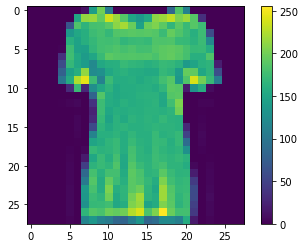

In [4]:
# Preprocessing the data : Let a sample image be taken from the dataset and visualize it 


plt.figure()
plt.imshow(train_img[10])
plt.colorbar()
plt.grid(False)
plt.show()

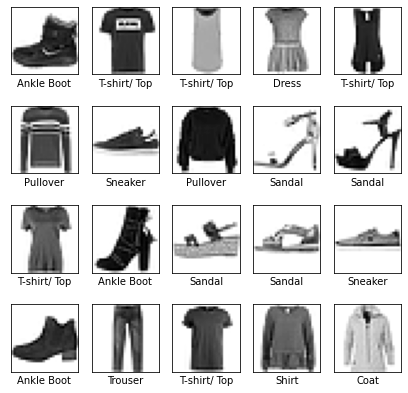

In [5]:
# The image is converted to Grey scale image by dividing with 255 and is checked whether the conversion is succcessful or not

train_img = train_img/255.0
test_img = test_img/255.0

plt.figure(figsize=(7,7))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i], cmap=plt.cm.binary)
    plt.xlabel(names[train_lbl[i]])
plt.show()

In [6]:
# Building the model with different input layers

model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation = 'relu'),
                         keras.layers.Dense(10)])

# compiling the model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [7]:
# testing the model and making predictions on it

model.fit(train_img, train_lbl, epochs=7)

# Evaluating the accuracy

test_loss, test_acc = model.evaluate(test_img, test_lbl, verbose=2)
print("Test accuracy for given dataset: ", test_acc)

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5019 - accuracy: 0.8234
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3714 - accuracy: 0.8674
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3344 - accuracy: 0.8788
Epoch 4/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3091 - accuracy: 0.8868
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2921 - accuracy: 0.8920
Epoch 6/7
1875/1875 [==============================] - ETA: 0s - loss: 0.2773 - accuracy: 0.89 - 6s 3ms/step - loss: 0.2775 - accuracy: 0.8972
Epoch 7/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2644 - accuracy: 0.9003
313/313 - 1s - loss: 0.3463 - accuracy: 0.8769
Test accuracy for given dataset:  0.8769000172615051


In [8]:
# predictions

p_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = p_model.predict(test_img)
predictions[1]

array([6.2188454e-05, 6.3008834e-12, 9.9514955e-01, 1.2807035e-11,
       4.4479338e-03, 1.0109029e-13, 3.4033900e-04, 2.8099200e-13,
       6.6789655e-12, 6.5883358e-12], dtype=float32)

In [9]:
np.argmax(predictions[0])

9

In [10]:
# Plotting the predictions

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.xticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    p_label = np.argmax(predictions_array)
    if p_label == true_label:
        color = 'blue'
    else:
        color = 'green'
        
    plt.xlabel("{} {:2.0f}% ({})".format(names[p_label], 100*np.max(predictions_array), names[true_label], color= color))
    
def plot_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    tplot = plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    p_label= np.argmax(predictions_array)
    
    tplot[p_label].set_color('green')
    tplot[true_label].set_color('blue')

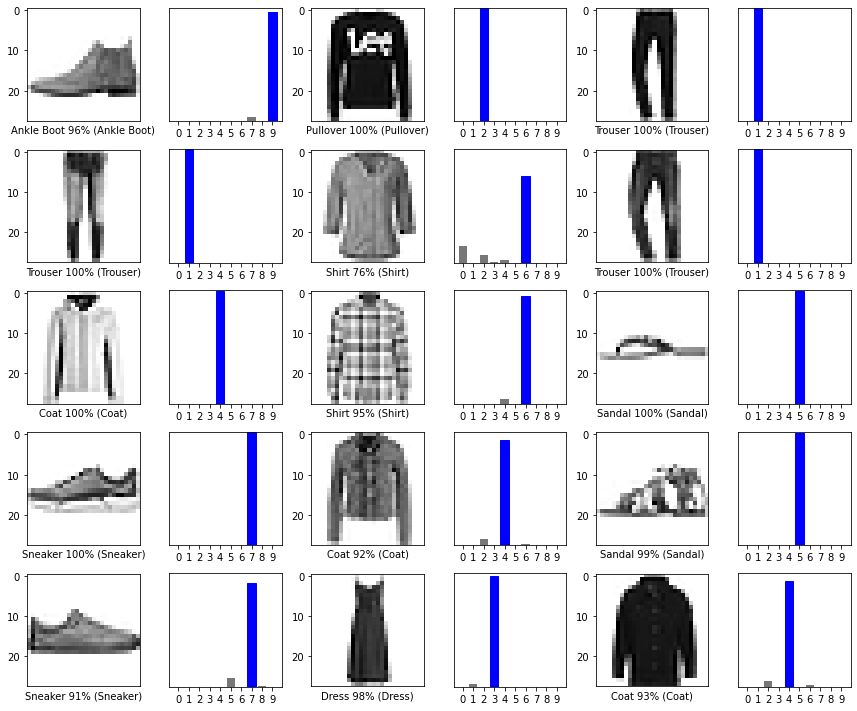

In [13]:
# Checking whether the images are classified correctly or incorrectly

n_rows=5
n_cols=3
n_images=n_rows*n_cols
plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(n_images):
    plt.subplot(n_rows, 2*n_cols, 2*i+1)
    plot_image(i, predictions[i], test_lbl, test_img)
    plt.subplot(n_rows, 2*n_cols, 2*i+2)
    plot_array(i, predictions[i], test_lbl)
plt.tight_layout()
plt.show()